In [840]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


#### 1. Load the dataset and display the first 5 rows.

In [841]:
# loading the dataset
df=pd.read_csv("ai_assistant_usage_student_life.csv")

In [842]:
#displaying the first few rows 
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


#### 2. Check the dataset shape (rows, columns).

In [843]:
# checking the data shape(rows and columns)
df.shape

(10000, 11)

#### 3. Display column names and their data types.

In [844]:
# displaying column names and their datatypes
df.dtypes

SessionID              object
StudentLevel           object
Discipline             object
SessionDate            object
SessionLengthMin      float64
TotalPrompts            int64
TaskType               object
AI_AssistanceLevel      int64
FinalOutcome           object
UsedAgain                bool
SatisfactionRating    float64
dtype: object

In [845]:
# displaying column names and their datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


#### 4. Check for missing values in each column.

In [846]:
#checking for missing values in each column
missing_value=df.isnull().sum()
missing_value

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

#### 5. Show summary statistics for SessionLenghtMin and TotalPrompts

In [847]:
#showing summary statistics for SessionLengthMin and TotalPrompts.
summary_stats=df[['SessionLengthMin', 'TotalPrompts']].describe()
summary_stats

,SessionLengthMin,TotalPrompts
count,10000.000000,10000.000000
mean,19.846467,5.607500
std,13.897302,4.648764
min,0.030000,1.000000
25%,9.630000,2.000000
50%,16.650000,4.000000
75%,26.670000,8.000000
max,110.810000,39.000000


#### 6. Finding the number of unique values in StudentLevel,Discipline and Tasktype

In [848]:
# unique values
Unique_StudentLevel=df['StudentLevel'].unique()
Unique_Discipline=df['Discipline'].unique()
Unique_Tasktype=df['TaskType'].unique()

Unique_StudentLevel,Unique_Discipline,Unique_Tasktype

(array(['Undergraduate', 'Graduate', 'High School'], dtype=object),
 array(['Computer Science', 'Psychology', 'Business', 'Biology', 'Math',
        'History', 'Engineering'], dtype=object),
 array(['Studying', 'Coding', 'Writing', 'Brainstorming', 'Homework Help',
        'Research'], dtype=object))

In [849]:
#Finding the number of unique values in StudentLevel, Discipline, and TaskType.
Unique_StudentLevel_counts=df['StudentLevel'].value_counts()
Unique_Discipline_counts=df['Discipline'].value_counts()
Unique_Tasktype_counts=df['TaskType'].value_counts()

Unique_StudentLevel,Unique_Discipline,Unique_Tasktype

(array(['Undergraduate', 'Graduate', 'High School'], dtype=object),
 array(['Computer Science', 'Psychology', 'Business', 'Biology', 'Math',
        'History', 'Engineering'], dtype=object),
 array(['Studying', 'Coding', 'Writing', 'Brainstorming', 'Homework Help',
        'Research'], dtype=object))

##### 7. What task type is the most common?


In [850]:
TaskType_count=df["TaskType"].value_counts()
TaskType_count

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

#### 8. Calculate the average session for each student level

In [851]:
# Average "SessionLength", grouping by student level
df.groupby("StudentLevel")["SessionLengthMin"].mean().round(2)

StudentLevel
Graduate         20.25
High School      20.02
Undergraduate    19.65
Name: SessionLengthMin, dtype: float64

#### 9. Plot a histogram of SessionLengthMin.

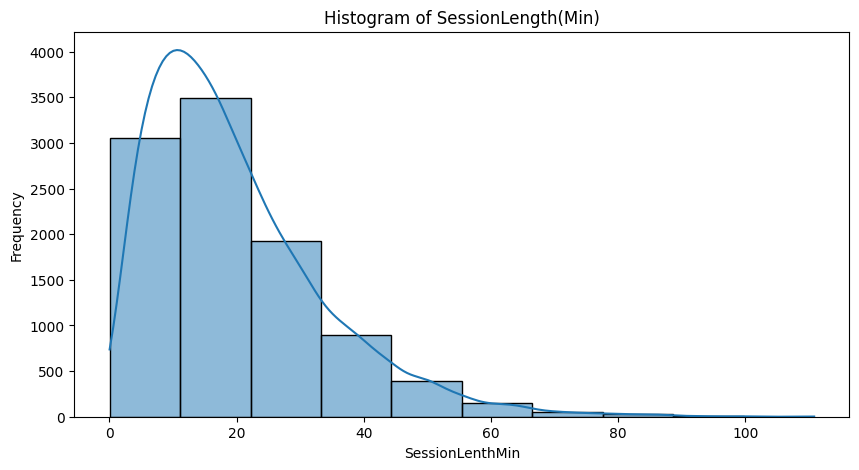

In [852]:
#plotting a histogram for the selling price
plt.figure(figsize=(10,5))
sns.histplot(df['SessionLengthMin'], kde=True,bins=10)
plt.title('Histogram of SessionLength(Min)')
plt.xlabel('SessionLenthMin')
plt.ylabel('Frequency')
plt.show()

#### 10. Create a bar chart of session counts by StudentLevel.

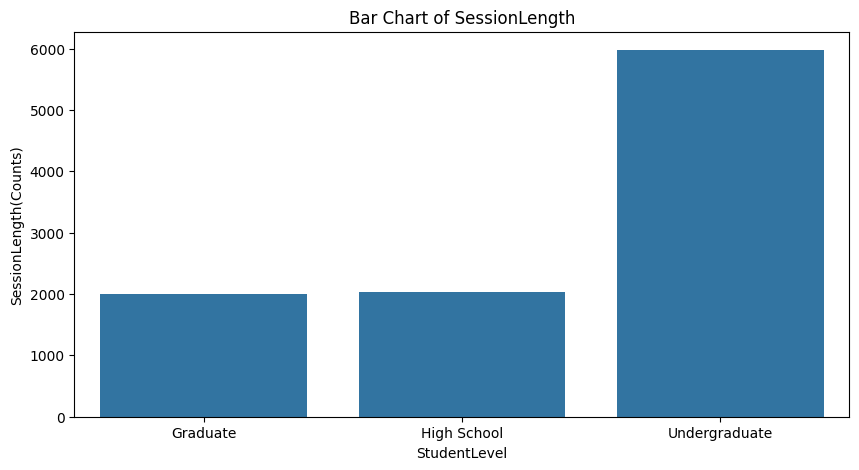

In [853]:
# Bar plot 
plt.figure(figsize=(10,5))
sns.barplot(df.groupby("StudentLevel")["SessionLengthMin"].count())
plt.title('Bar Chart of SessionLength')
plt.xlabel('StudentLevel')
plt.ylabel('SessionLength(Counts)')
plt.show()

#### 11. Make a countplot of TaskType using Seaborn.


C:\Users\Admin\AppData\Local\Temp\ipykernel_43700\4261379347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["TaskType"], palette="cool")


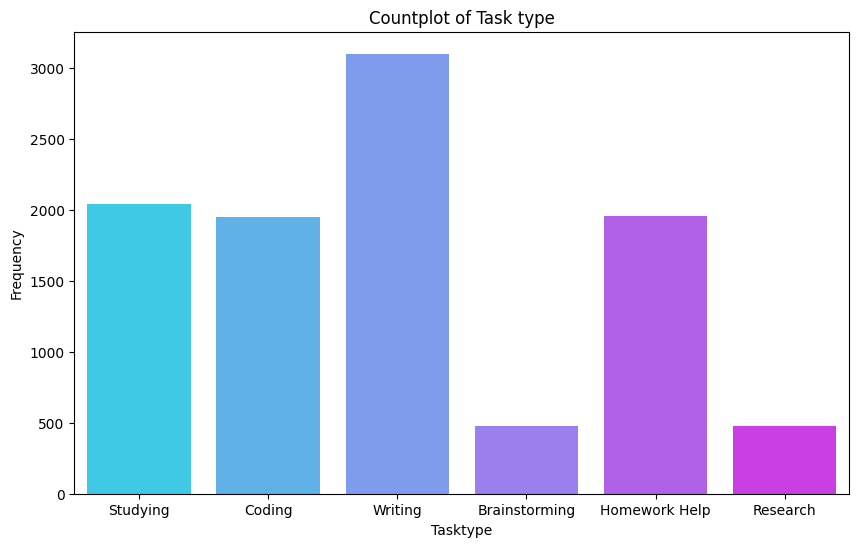

In [854]:
# Countplot of Tasktype 
plt.figure(figsize=(10,6))
sns.countplot(x=df["TaskType"], palette="cool")
plt.title('Countplot of Task type')
plt.xlabel('Tasktype')
plt.ylabel('Frequency')
plt.show()

#### 12.Plot a boxplot of SessionLengthMin grouped by StudentLevel.

C:\Users\Admin\AppData\Local\Temp\ipykernel_43700\2991521953.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="StudentLevel", y="SessionLengthMin", palette="coolwarm")


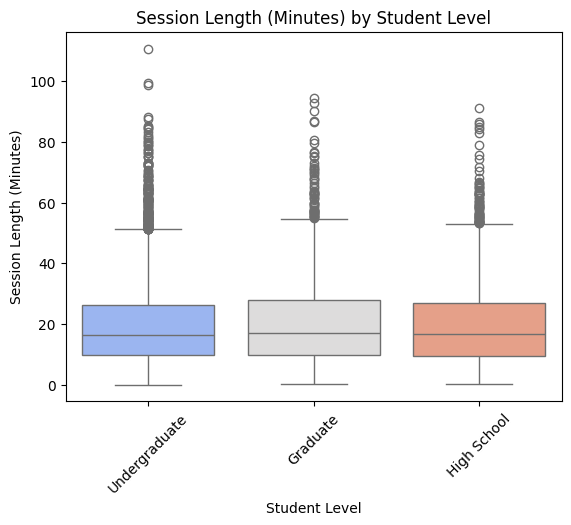

In [855]:
sns.boxplot(data=df, x="StudentLevel", y="SessionLengthMin", palette="coolwarm")

plt.title("Session Length (Minutes) by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Session Length (Minutes)")
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()

#### 13. Create a pie chart showing proportions of FinalOutcome.

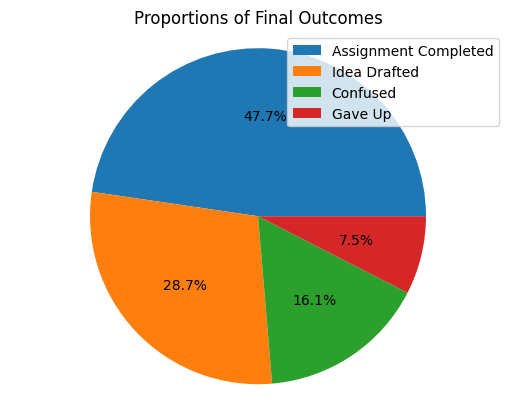

In [856]:
plt.pie(df["FinalOutcome"].value_counts(), autopct='%1.1f%%')
plt.title("Proportions of Final Outcomes")
plt.axis("equal")
plt.legend(df["FinalOutcome"].unique())
plt.show()

#### 14. Draw a scatterplot of SessionLengthMin vs. TotalPrompts.


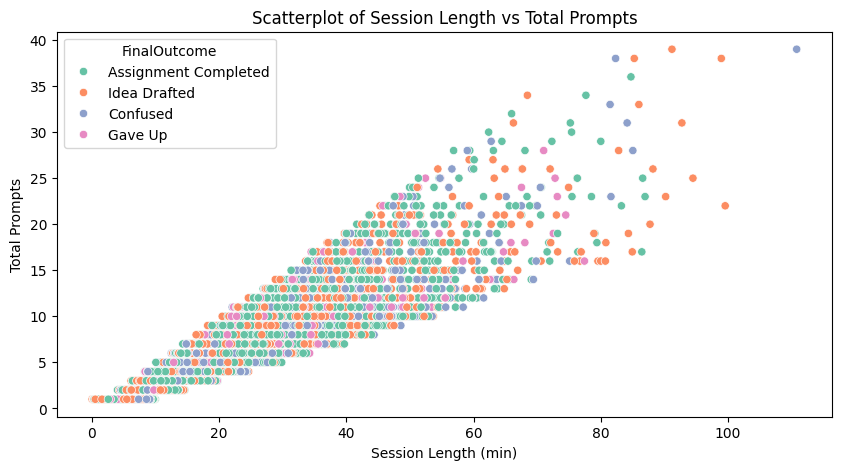

In [857]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="SessionLengthMin", y="TotalPrompts", hue="FinalOutcome", palette="Set2")
plt.title("Scatterplot of Session Length vs Total Prompts")
plt.xlabel("Session Length (min)")
plt.ylabel("Total Prompts")
plt.show()

In [858]:
df

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9
...,...,...,...,...,...,...,...,...,...,...,...
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,Studying,3,Assignment Completed,True,4.2
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,Writing,5,Assignment Completed,True,5.0
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,Studying,3,Idea Drafted,True,3.5
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,Writing,3,Assignment Completed,False,4.3


#### 15. Plot a line chart of average AI_AssistanceLevel over time (SessionDate).


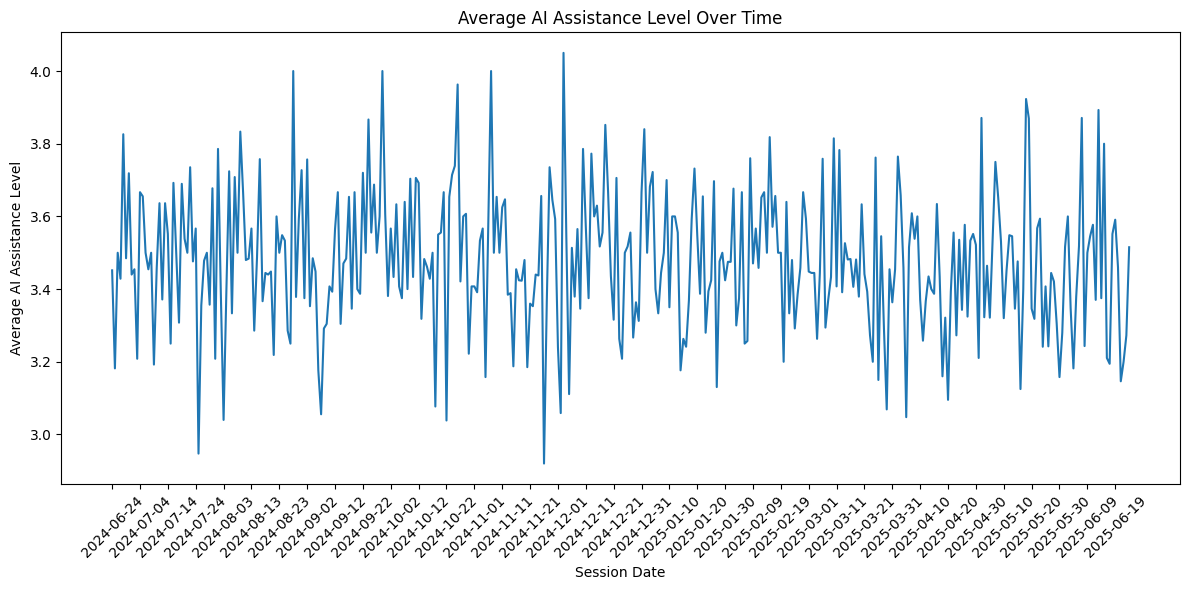

In [859]:
# Plotting the average AI assistance level over time
plt.figure(figsize=(12,6))
df_grouped = df.groupby("SessionDate")["AI_AssistanceLevel"].mean()
plt.plot(df_grouped)
plt.title("Average AI Assistance Level Over Time")
plt.xlabel("Session Date")
plt.ylabel("Average AI Assistance Level")
# Show every 10th date
plt.xticks(df_grouped.index[::10], rotation=45)
plt.tight_layout()
plt.show()

#### 16.Create a heatmap of correlations among numeric features.

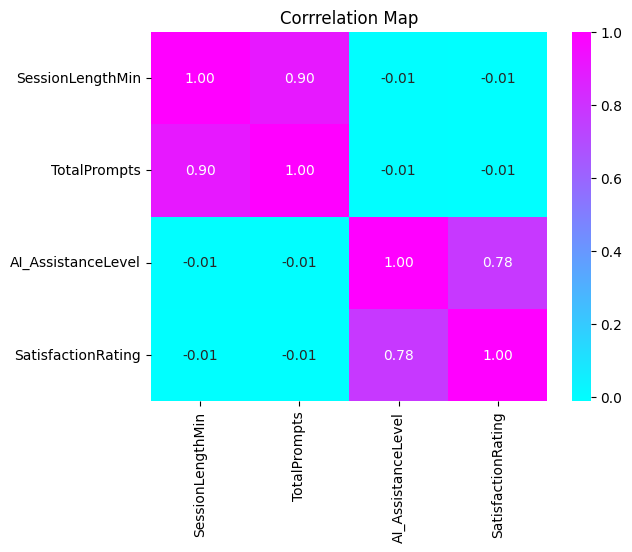

In [860]:
numeric_col = ['SessionLengthMin','TotalPrompts','AI_AssistanceLevel','SatisfactionRating']
sns.heatmap(df[numeric_col].corr(),annot=True, fmt=".2f", cmap='cool') # fmt to round off, ## cmap=cool,rocket,crest,magna
plt.title("Corrrelation Map")
plt.show()

##### Interpretation
1. SessionLengthMin Vs TotalPrompts → 0.90 (very strong positive correlation)

- The longer a session, the more prompts users send.

2. AI_AssistanceLevel Vs SatisfactionRating -  0.78 (strong positive correlation)

- Higher AI assistance levels are strongly associated with higher satisfaction ratings.

- This suggests AI help is an important driver of user satisfaction.

3. SessionLengthMin / TotalPrompts and AI_AssistanceLevel / SatisfactionRating - -0.01 (no meaningful correlation)

Session duration and number of prompts are not related to assistance level or satisfaction.

- spending more time or sending more prompts doesn’t automatically make users more satisfied.

### GroupBy & Aggregations

#### 17.  Average SessionLengthMin for each TaskType.

In [861]:
avr_session_length=df.groupby("TaskType")["SessionLengthMin"].mean().round(2)
avr_session_length

TaskType
Brainstorming    21.96
Coding           19.47
Homework Help    19.94
Research         20.41
Studying         19.71
Writing          19.71
Name: SessionLengthMin, dtype: float64

#### 18. Discipline with the most session

In [862]:
discipline_max_session=df["Discipline"].value_counts()
discipline_max_session

Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
History             1417
Business            1410
Name: count, dtype: int64

#### 19. Average AI_AssistanceLevel across StudentLevel.

In [863]:
Avr_AI_Assistant_Level=df.groupby("StudentLevel")["AI_AssistanceLevel"].mean().round(3)
Avr_AI_Assistant_Level

StudentLevel
Graduate         3.470
High School      3.477
Undergraduate    3.484
Name: AI_AssistanceLevel, dtype: float64

In [864]:
df


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9
...,...,...,...,...,...,...,...,...,...,...,...
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,Studying,3,Assignment Completed,True,4.2
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,Writing,5,Assignment Completed,True,5.0
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,Studying,3,Idea Drafted,True,3.5
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,Writing,3,Assignment Completed,False,4.3


#### 20.  Most common FinalOutcome for Graduate students.

In [865]:
#most common final outcome for studentlevel=graduate
most_common_final_outcome = df[df["StudentLevel"] == "Graduate"]["FinalOutcome"].mode()[0]
most_common_final_outcome

'Assignment Completed'

#### 21. Median SessionLengthMin for each FinalOutcome.

In [866]:
median_SessionLengthMin=df.groupby("FinalOutcome")["SessionLengthMin"].median()
median_SessionLengthMin

FinalOutcome
Assignment Completed    16.570
Confused                16.040
Gave Up                 17.290
Idea Drafted            17.085
Name: SessionLengthMin, dtype: float64

###  Feature Engineering & Encoding

#### 22. Converting SessionDate into Year, Month, and Day columns.

In [867]:
#converting SessionDate to date/time
df['SessionDate'] = pd.to_datetime(df['SessionDate'])

In [868]:
# Extracting Year, Month, Day
df['Year'] = df['SessionDate'].dt.year
df['Month'] = df['SessionDate'].dt.month
df['Day'] = df['SessionDate'].dt.day

In [869]:
df

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,Studying,3,Assignment Completed,True,4.2,2024,7,20
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,Writing,5,Assignment Completed,True,5.0,2024,11,11
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,Studying,3,Idea Drafted,True,3.5,2024,9,11
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,Writing,3,Assignment Completed,False,4.3,2024,10,27


#### 23. Encode StudentLevel using Label Encoding.

In [870]:
#encoding StudentLevel using Label Encoding
le=LabelEncoder()
Student_level_Encoded=le.fit_transform(df["StudentLevel"])
Student_level_Encoded

array([2, 2, 2, ..., 2, 2, 2], shape=(10000,))

#### 24.Apply One-Hot Encoding to TaskType.

In [871]:

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df["TaskType"].values.reshape(-1,1))

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(["TaskType"]))

df_sklearn_encoded = pd.concat([df.drop("TaskType", axis=1), one_hot_df], axis=1)

df_sklearn_encoded


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,2024,11,3,0.0,0.0,0.0,0.0,1.0,0.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,2024,8,25,0.0,0.0,0.0,0.0,1.0,0.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,2025,1,12,0.0,1.0,0.0,0.0,0.0,0.0
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,2025,5,6,0.0,1.0,0.0,0.0,0.0,0.0
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,2025,3,18,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,3,Assignment Completed,True,4.2,2024,7,20,0.0,0.0,0.0,0.0,1.0,0.0
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,5,Assignment Completed,True,5.0,2024,11,11,0.0,0.0,0.0,0.0,0.0,1.0
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,3,Idea Drafted,True,3.5,2024,9,11,0.0,0.0,0.0,0.0,1.0,0.0
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,3,Assignment Completed,False,4.3,2024,10,27,0.0,0.0,0.0,0.0,0.0,1.0


#### 25. Create a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin.

In [872]:
# creating a new feature PromptsPerMinute
df['PromptsPerMinute'] = df['TotalPrompts'] / df['SessionLengthMin']
df

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,PromptsPerMinute
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,0.352564
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,0.458365
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,0.260146
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,0.270270
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,0.320057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,Studying,3,Assignment Completed,True,4.2,2024,7,20,0.175994
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,Writing,5,Assignment Completed,True,5.0,2024,11,11,0.429185
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,Studying,3,Idea Drafted,True,3.5,2024,9,11,0.185529
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,Writing,3,Assignment Completed,False,4.3,2024,10,27,0.226684


#### 26. Bin SessionLengthMin into categories: Short, Medium, Long.

In [873]:
# Binning SessionLengthMin into categories: Short, Medium, Long.
bins = [0, 15, 30, float('inf')] #first bin: 0-15, second bin: 15-30, third bin: 30 and above and float('inf') is used to include all values above 30
labels = ['Short', 'Medium', 'Long']
df['SessionLengthCategory'] = pd.cut(df['SessionLengthMin'], bins=bins, labels=labels, right=False)
df['SessionLengthCategory'].value_counts()

SessionLengthCategory
Short     4453
Medium    3590
Long      1957
Name: count, dtype: int64

### Machine Learning (Classification Models)

In [874]:
df.dtypes

SessionID                        object
StudentLevel                     object
Discipline                       object
SessionDate              datetime64[ns]
SessionLengthMin                float64
TotalPrompts                      int64
TaskType                         object
AI_AssistanceLevel                int64
FinalOutcome                     object
UsedAgain                          bool
SatisfactionRating              float64
Year                              int32
Month                             int32
Day                               int32
PromptsPerMinute                float64
SessionLengthCategory          category
dtype: object

In [875]:
# Drop unwanted columns
cols_to_drop = ['SessionDate', 'SessionLengthCategory','SessionID']
df.drop(columns=cols_to_drop,inplace=True)


In [876]:
df['UsedAgain'] = df['UsedAgain'].astype(int)

In [877]:
#Encoding categorical columnS
categorical_cols = ['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome']
le_dict = {}  # To store LabelEncoders for each column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Saving encoder (if needed for inverse transform)

In [878]:
df.dtypes

StudentLevel            int64
Discipline              int64
SessionLengthMin      float64
TotalPrompts            int64
TaskType                int64
AI_AssistanceLevel      int64
FinalOutcome            int64
UsedAgain               int64
SatisfactionRating    float64
Year                    int32
Month                   int32
Day                     int32
PromptsPerMinute      float64
dtype: object

#### 27. Predict FinalOutcome using a Decision Tree Classifier.

In [879]:
#Making a copy of the dataset
df_copy = df.copy()

In [880]:
#Defining features (X) and target (y)
X = df_copy.drop(["FinalOutcome"], axis=1)
y = df_copy["FinalOutcome"]

In [881]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [882]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [883]:
y_pred = dt_model.predict(X_test)

In [884]:

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.483
Confusion Matrix:
[[804  56   5  65]
 [217  80   5  47]
 [110  37   4  19]
 [434  37   2  78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.86      0.64       930
           1       0.38      0.23      0.29       349
           2       0.25      0.02      0.04       170
           3       0.37      0.14      0.21       551

    accuracy                           0.48      2000
   macro avg       0.38      0.31      0.29      2000
weighted avg       0.43      0.48      0.41      2000



#### 28. Predict UsedAgain using Logistic Regression.

In [885]:
X = df_copy.drop("UsedAgain",axis=1)
y = df_copy["UsedAgain"]

In [886]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [887]:
Log_model = LogisticRegression(random_state=42,max_iter=5000)
Log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [888]:
y_pred = Log_model.predict(X_test)

In [889]:

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7065
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.71      1.00      0.83      1413

    accuracy                           0.71      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.50      0.71      0.58      2000



c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

#### 29. Train a Random Forest Classifier to predict FinalOutcome.

In [890]:
X = df_copy.drop("FinalOutcome",axis=1)
y = df_copy["FinalOutcome"]

In [891]:

# Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=100,          # number of trees
    random_state=42,          
    class_weight="balanced"    # handling imbalance
)


In [892]:
# Train model
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [893]:

# Predictions
y_pred_rf = rf.predict(X_test)

In [894]:
# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7225

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.28      0.37       587
           1       0.75      0.91      0.82      1413

    accuracy                           0.72      2000
   macro avg       0.65      0.59      0.60      2000
weighted avg       0.69      0.72      0.69      2000



#### 30. Use KNN (K-Nearest Neighbors) to classify UsedAgain. 


In [895]:
X = df_copy.drop("UsedAgain",axis=1)
y = df_copy["UsedAgain"]

In [896]:

# Scaling features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [897]:
# Initializing KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [898]:
# Training model
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [899]:
# Predictions
y_pred_knn = knn.predict(X_test_scaled)

In [900]:
# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.674

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.23      0.29       587
           1       0.73      0.86      0.79      1413

    accuracy                           0.67      2000
   macro avg       0.56      0.54      0.54      2000
weighted avg       0.63      0.67      0.64      2000



#### 31. Train a Naive Bayes Classifier to predict FinalOutcome.

In [901]:
from sklearn.naive_bayes import GaussianNB

In [902]:
X = df_copy.drop("FinalOutcome",axis=1)
y = df_copy["FinalOutcome"]

In [903]:

# Initializing Naive Bayes
nb = GaussianNB()

In [904]:
# Training the model
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [905]:
# Predictions
y_pred_nb = nb.predict(X_test)

In [906]:
# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.464

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.76      0.46       587
           1       0.78      0.34      0.47      1413

    accuracy                           0.46      2000
   macro avg       0.55      0.55      0.46      2000
weighted avg       0.64      0.46      0.47      2000



#### 32. Build a Gradient Boosting Classifier for UsedAgain.


In [907]:
y = df["UsedAgain"]   # target variable
X = df.drop("UsedAgain", axis=1)

In [908]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

In [909]:
# Training the model
gb_clf.fit(X_train, y_train)   

# Predictions
y_pred_gb = gb_clf.predict(X_test)

In [910]:
# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7365

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.41      0.48       587
           1       0.78      0.87      0.82      1413

    accuracy                           0.74      2000
   macro avg       0.68      0.64      0.65      2000
weighted avg       0.72      0.74      0.72      2000



#### 33. Apply an XGBoost Classifier to predict FinalOutcome.

In [911]:
df.dtypes

StudentLevel            int64
Discipline              int64
SessionLengthMin      float64
TotalPrompts            int64
TaskType                int64
AI_AssistanceLevel      int64
FinalOutcome            int64
UsedAgain               int64
SatisfactionRating    float64
Year                    int32
Month                   int32
Day                     int32
PromptsPerMinute      float64
dtype: object

In [912]:
# X = features, y = FinalOutcome
X = df.drop("FinalOutcome",axis=1)
y = df["FinalOutcome"]


In [913]:
#Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [914]:
# computing class weights
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
sample_weights = np.array([weights[i] for i in y_train])

In [915]:
xgb_model= XGBClassifier(
    num_class=len(classes),
    max_depth=5,        # depth of trees
    learning_rate=0.1,  # step size
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"

)


In [916]:
xgb_model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [917]:
y_pred = xgb_model.predict(X_test)


In [918]:
# Evaluation
print("XGB Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

XGB Accuracy: 0.2225

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.21      0.30       953
           1       0.15      0.75      0.25       323
           2       0.00      0.00      0.00       151
           3       0.00      0.00      0.00       573

    accuracy                           0.22      2000
   macro avg       0.16      0.24      0.14      2000
weighted avg       0.25      0.22      0.18      2000



c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

#### 34. Split the dataset into 80% training and 20% testing sets.

In [919]:
# Train-test split (80-20) with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (8000, 12)
Testing set size: (2000, 12)


#### 35. Evaluate one model using accuracy and a confusion matrix.

In [920]:
#XGB
y_pred =xgb_model.predict(X_test)

#Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.607
Confusion Matrix:
 [[833  42   2  53]
 [148 166   2  33]
 [ 89  42  17  22]
 [323  30   0 198]]


#### 36. Generate a classification report (precision, recall, f1-score).

In [921]:

# Predicting using the XGB model
y_pred = xgb_model.predict(X_test)

#Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.90      0.72       930
           1       0.59      0.48      0.53       349
           2       0.81      0.10      0.18       170
           3       0.65      0.36      0.46       551

    accuracy                           0.61      2000
   macro avg       0.66      0.46      0.47      2000
weighted avg       0.63      0.61      0.57      2000



### Model Evaluation & Hyperparameter Tuning


#### 37. Perform cross-validation for Logistic Regression.

In [922]:
from sklearn.model_selection import cross_val_score

In [923]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [924]:
# Initializing the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

In [925]:
cv_scores = cross_val_score(logreg_model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.4835 0.4825 0.4725 0.4715 0.4745]
Mean cross-validation accuracy: 0.4769


#### 38. Use GridSearchCV to tune hyperparameters of a Decision Tree.

In [926]:
from sklearn.model_selection import GridSearchCV
#Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definimg the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')


In [927]:
#Hyperparameters grid
param_grid = {
    'max_depth': [5],          
    'min_samples_split': [2],  
    'min_samples_leaf': [1],
} 


In [928]:
#GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy'
)


In [929]:
#Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [930]:

# Evaluating on test set
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.379
Confusion Matrix:
 [[345  68 121 419]
 [ 65  72 110  76]
 [ 33  35  50  33]
 [179  42  61 291]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.36      0.44       953
           1       0.33      0.22      0.27       323
           2       0.15      0.33      0.20       151
           3       0.36      0.51      0.42       573

    accuracy                           0.38      2000
   macro avg       0.35      0.36      0.33      2000
weighted avg       0.43      0.38      0.39      2000



#### 39. Tune a Random Forest Classifier (n_estimators, max_depth).

In [931]:
# Define the model
rf_model = RandomForestClassifier(random_state=42)

In [932]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 5, 10, 15]   # Maximum depth of each tree
}

In [933]:
# Fitting the model
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [5], 'min_samples_leaf': [1], 'min_samples_split': [2]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [934]:

# Best hyperparameters
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [935]:

# Predictions on test set
y_pred = grid_search.predict(X_test)

In [936]:
# Evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.379
Confusion Matrix:
 [[345  68 121 419]
 [ 65  72 110  76]
 [ 33  35  50  33]
 [179  42  61 291]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.36      0.44       953
           1       0.33      0.22      0.27       323
           2       0.15      0.33      0.20       151
           3       0.36      0.51      0.42       573

    accuracy                           0.38      2000
   macro avg       0.35      0.36      0.33      2000
weighted avg       0.43      0.38      0.39      2000



#### 40. Compare Logistic Regression, Decision Tree, Random Forest, Naive Bayes, KNN, Gradient Boosting, and XGBoost for predicting UsedAgain.

In [937]:
# Features and target
X = df.drop('UsedAgain',axis=True)  # drop target and datetime
y = df['UsedAgain']

In [938]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [939]:
# Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [940]:
# Defining the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42,class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [941]:

# Dictionary to store results
results = {}

In [942]:
# Training and evaluating each model
for name, model in models.items():
    print(f"{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results[name] = acc
    
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)
   

Logistic Regression


Accuracy: 0.5655
Confusion Matrix:
 [[292 295]
 [574 839]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.50      0.40       587
           1       0.74      0.59      0.66      1413

    accuracy                           0.57      2000
   macro avg       0.54      0.55      0.53      2000
weighted avg       0.62      0.57      0.58      2000

Decision Tree
Accuracy: 0.7365
Confusion Matrix:
 [[ 273  314]
 [ 213 1200]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.47      0.51       587
           1       0.79      0.85      0.82      1413

    accuracy                           0.74      2000
   macro avg       0.68      0.66      0.66      2000
weighted avg       0.72      0.74      0.73      2000

Random Forest
Accuracy: 0.7350
Confusion Matrix:
 [[ 189  398]
 [ 132 1281]]
Classification Report:
               precision    recall  f1-score   support

      

In [943]:
# Summary of model accuracies
print("==Model Accuracy Comparison==")
for name, acc in results.items():
    print(f"{name}: {acc:.3f}")

==Model Accuracy Comparison==
Logistic Regression: 0.566
Decision Tree: 0.737
Random Forest: 0.735
Naive Bayes: 0.464
KNN: 0.630
Gradient Boosting: 0.739
XGBoost: 0.719
